# Advanced Regression Assignment

## About this assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Assignment begins
<hr/>
We will use python to build a multiple regression model for this assignment. We will determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# Import python libraries used for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas._libs.parsers import STR_NA_VALUES

# Imports from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import sklearn.model_selection as ms
from scipy.stats import boxcox

# Import math
import math

# Specify some default settings for the project
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150
pd.options.display.max_colwidth = 200
sns.set_palette('viridis')
sns.set_style("whitegrid", {'axes.facecolor': '#e9f0f7', 'grid.color': 'white'})

#### This assignment is divided into nine main sections:
1. [Reading and Understanding Data](#1.-Reading-and-Understanding-Data)
2. [Data Visualization & EDA](#2.-Data-Visualization-&-EDA)
3. [Data Preparation](#3.-Data-Preparation)
4. [Splitting Data into Training and Test sets](#4.-Splitting-Data-into-Training-and-Test-sets)
5. [Building Ridge Model](#5.-Building-Linear-Model)
6. [Building Lasso Model](#6.-Residual-Analysis-of-the-Train-data)
7. [Model Prediction](#7.-Model-Prediction)
8. [Model Evaluation](#8.-Model-Evaluation)
9. [Conclusion](#9.-Conclusion)

## 1. Reading and Understanding Data
<hr/>

**NOTE:** According to the data dictionary, several fields have **NA** as a regular value so we will load the dataset by passing **keep_default_na=False** parameter. This tells pands to treat "NA" values in the CSV file as regular data and not to replace them with NaN.

In [2]:
# Load provided bike sharing data
df_housing = pd.read_csv('train.csv')

In [3]:
# Preview the data
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check number of rows and columns
df_housing.shape

(1460, 81)

In [5]:
print(df_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dataset seems to be composed of several numeric and categorical fields

In [6]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Define some utility functions that we will be used on this section

In [7]:
# Returns list of fields that has null values
def get_null_fields(df, include=None):
    if (include):
        df = df.select_dtypes(include=include)
    null_value_columns = df.columns[df.isnull().any()]
    return null_value_columns

# Displays list of fields that has null values
def show_null_fields(df, include=None):
    num_rows = len(df)
    null_value_columns = get_null_fields(df, include)
    # Calculate the percentage of null values
    null_percentage = [(column, (df[column].isnull().sum() / num_rows) * 100) for column in null_value_columns]
    sorted_null_percentage = sorted(null_percentage, key=lambda x: x[1], reverse=True)
    for column, percent_nulls in sorted_null_percentage:
        print(f"{column} {percent_nulls:.2f}%")
    print(f"{len(null_value_columns)} fields has null values.")
    
# Returns list of fields with numeric data type
def get_numeric_fields(df):
    return df.select_dtypes(include=['number']).columns.tolist()
# Returns list of fields with non-numeric data type
def get_categorical_fields(df):
    return df.select_dtypes(exclude=['number']).columns.tolist()

# Displays a summary detail of fields that are numeric and non-numeric
def summarize_fields(df):
    numeric_fields = get_numeric_fields(df)
    print(f"There are {len(numeric_fields)} numeric fields:")
    print(numeric_fields)
    non_numeric_fields = get_categorical_fields(df)
    print(f"\nThere are {len(non_numeric_fields)} categorical fields:")
    print(non_numeric_fields)

**Percent of null values in column:**

In [8]:
# Check how many fields have any null values and percent of null values in the fields
show_null_fields(df_housing)

PoolQC 99.52%
MiscFeature 96.30%
Alley 93.77%
Fence 80.75%
FireplaceQu 47.26%
LotFrontage 17.74%
GarageType 5.55%
GarageYrBlt 5.55%
GarageFinish 5.55%
GarageQual 5.55%
GarageCond 5.55%
BsmtExposure 2.60%
BsmtFinType2 2.60%
BsmtQual 2.53%
BsmtCond 2.53%
BsmtFinType1 2.53%
MasVnrType 0.55%
MasVnrArea 0.55%
Electrical 0.07%
19 fields has null values.


List of numeric and non-numeric fields identified based on type of data it stores are shown below:

In [9]:
summarize_fields(df_housing)

There are 38 numeric fields:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

There are 43 categorical fields:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', '

#### Observations
- There are **1460** rows and **81** columns in this dataset
- Dataset contains several of numerical and categorical features
- 19 fields have some null values 

### 1.2 Data Cleaning

Define some utility functions that we will be used on this section

In [10]:
# Drops given columns in-place and prints some relevant information
def drop_columns(df, cols):
    print("Shape of dataframe before dropping columns:", df.shape)
    # Drop specified columns
    df.drop(cols, axis = 1, inplace=True)
    print("Shape of dataframe after dropping columns:", df.shape)
    print("Specified columns have been dropped!")
    
# Drop columns that more % of null values than specified threshold
def drop_null_value_columns(df, threshold):
    null_columns = (df.isnull().sum() / len(df)) * 100
    null_columns = null_columns[null_columns > threshold].index.tolist()
    print(f"Columns to drop with more than {threshold}% null values: {null_columns}")
    drop_columns(df_housing, null_columns)
    
# Create a barchart of fields that has null values against % of null values
# Also show a threshold line
def plot_null_percentages(df, threshold):
    # Calculate null percentages
    null_percentages = (df.isnull().sum() / len(df)) * 100
    sorted_null_percentages = null_percentages[null_percentages > 0].sort_values(ascending=False)
    # Plot the values on a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_null_percentages.index, y=sorted_null_percentages.values)
    plt.title('Percentage of Missing Values by Features')
    plt.xlabel('Features')
    plt.ylabel('Missing Value Percentages (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.axhline(y=threshold, color='r', linestyle='-')
   
    # Show the plot
    plt.show()
        
# Cast data type of a column to string
def cast_to_string(df, cols):
    for column in cols:
        df[column] = df[column].astype(str)
    

def show_boxplots_vs_sale_price(df, y_fields):
    df = df.copy()
    n_rows = int(np.ceil(len(y_fields) / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows*3))
    axes = axes.flatten()
    # Create bins for sale price
    bins = [0, 200000, 400000, 600000, float('inf')]
    labels = ['0-200k', '200k-400k', '400k-600k', '600k+']
    df['SalePriceBin'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)

    for i, field in enumerate(y_fields):
        ax = axes[i] 
        sns.boxplot(x='SalePriceBin', y=field,data=df, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(field)
        ax.set_xlabel('Sale Price') 

    plt.tight_layout()
    plt.show()
    
# Detects outliers using the IQR*1.5 method
def detect_outliers(x):
    # Calculate first and third quantile
    q1, q3 = np.quantile(x, 0.25), np.quantile(x, 0.75)
    # Calculate interquartile range
    iqr = q3 - q1
    # Return results
    return (x > q3 + (iqr * 1.5)) | (x < q1 - (iqr * 1.5))

# Removes all outliers detected by detect_outliers method
def remove_outliers(df, columns):
    print("Shape of dataframe before removing outliers:", df.shape)
    # Drop rows that are detected to contain outliers for specified field
    for column in columns:
        df.drop(df[detect_outliers(df[column])].index, axis = 0, inplace=True)
    print("Shape of dataframe after removing outliers:", df.shape)
    print(f'Outliers for "{columns}" have been field removed!')

#### 1.2.1 Drop column if > 80% is null value
We will drop columns that has more than 80% null values because they will no improve the model

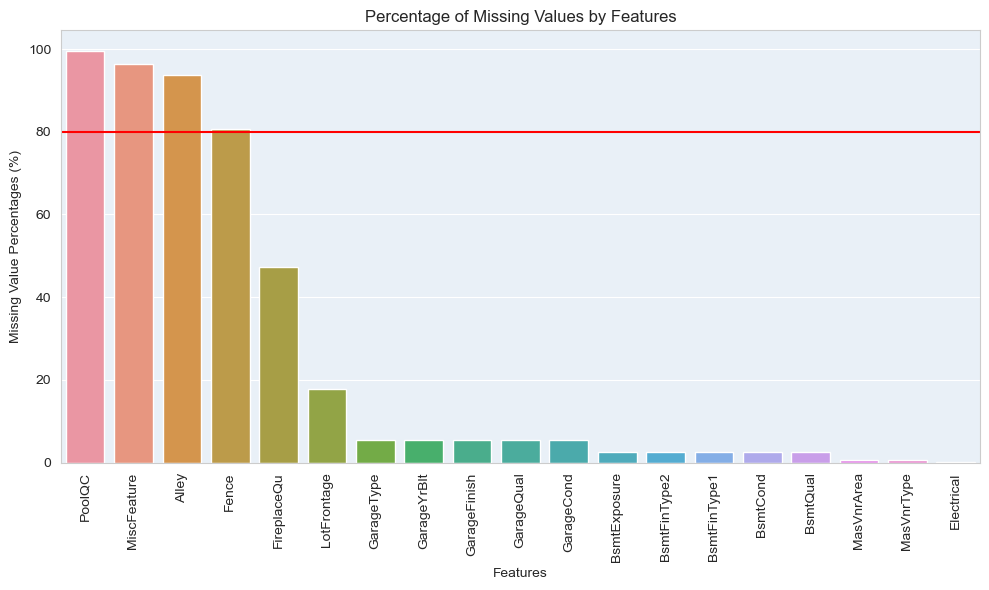

In [11]:
plot_null_percentages(df_housing, 80)

In [12]:
# Drop columns PoolQC, MiscFeature, Alley, Fence as they have more than 80% missing values 
# hence they won't contribute to a better model
drop_null_value_columns(df_housing, 80)

Columns to drop with more than 80% null values: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Shape of dataframe before dropping columns: (1460, 81)
Shape of dataframe after dropping columns: (1460, 77)
Specified columns have been dropped!


#### 1.2.2  Impute missing values

*Check numeric columns with missing values*

In [13]:
show_null_fields(df_housing, include=['number'])

LotFrontage 17.74%
GarageYrBlt 5.55%
MasVnrArea 0.55%
3 fields has null values.


*Fill missing values for numeric columns*

In [14]:
# LotFrontage has 17.74% missing values. Filling with median.
df_housing['LotFrontage'] = df_housing.LotFrontage.fillna(df_housing.LotFrontage.median())
# MasVnrArea has 0.55% missing values. It would mean the house has no Masonry veneer so fill with 0.
df_housing['MasVnrArea'] = df_housing.MasVnrArea.fillna(0)
# GarageYrBlt represents year number so we fill with YearBuilt.
df_housing['GarageYrBlt']=df_housing["GarageYrBlt"].fillna(df_housing['YearBuilt'])

*Check categorical columns with missing values*

In [15]:
show_null_fields(df_housing, include=['object'])

FireplaceQu 47.26%
GarageType 5.55%
GarageFinish 5.55%
GarageQual 5.55%
GarageCond 5.55%
BsmtExposure 2.60%
BsmtFinType2 2.60%
BsmtQual 2.53%
BsmtCond 2.53%
BsmtFinType1 2.53%
MasVnrType 0.55%
Electrical 0.07%
12 fields has null values.


*Fill missing values for categorical columns with NA according to data dictionary*

In [16]:
null_categorical_columns = get_null_fields(df_housing, include='object')
df_housing[null_categorical_columns] = df_housing[null_categorical_columns].fillna("NA")

*Check if there are any more columns with null values*

In [17]:
show_null_fields(df_housing)

0 fields has null values.


#### 1.2.3  Correct the datatypes

Based on the data dictionary and preview of the data, the following columns should also be categorical: MSSubClass, YearBuilt, YearRemodAdd, YrSold, OverallQual and OverallCond

In [18]:
# These features should be treated as string datatype
cast_to_string(df_housing, ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'])

In [19]:
summarize_fields(df_housing)

There are 33 numeric fields:
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']

There are 44 categorical fields:
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

#### 1.2.4 Drop id column

In [20]:
# Drop id columns as it won't contributed to a better model
drop_columns(df_housing, ['Id'])

Shape of dataframe before dropping columns: (1460, 77)
Shape of dataframe after dropping columns: (1460, 76)
Specified columns have been dropped!


#### 1.2.5 Features Engineering

In [21]:
# Add some sensible derived features
df_housing['TotalArea'] = df_housing['TotalBsmtSF'] + df_housing['1stFlrSF'] + df_housing['2ndFlrSF'] + df_housing['GrLivArea'] + df_housing['GarageArea']
df_housing['TotalBath'] = df_housing['BsmtFullBath'] + df_housing['BsmtHalfBath'] + df_housing['FullBath'] + df_housing['HalfBath']
df_housing['PropertyAge'] = df_housing['YrSold'].astype(int).max() - df_housing['YearBuilt'].astype(int)
df_housing['Remodeled'] = (df_housing['YearBuilt'].astype(int) < df_housing['YearRemodAdd'].astype(int)).astype(int)

#### 1.26 Check for duplicate rows

In [22]:
# Check for duplicate rows
df_housing[df_housing.duplicated()].shape

(0, 80)

*No duplicates found*

#### 1.2.7 Outlier treatment

Inspect boxplots of all numeric features in the context of Sale Price

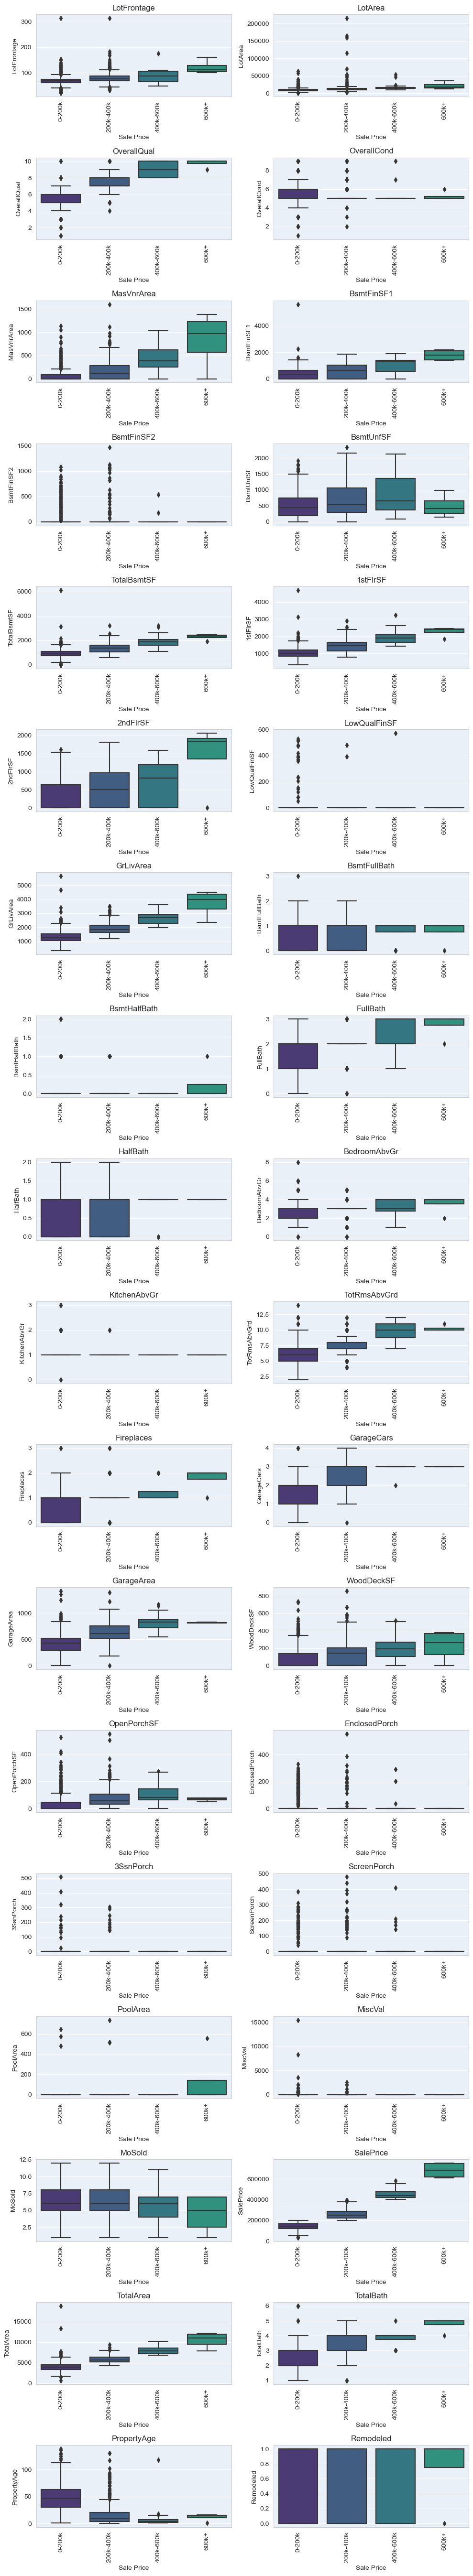

In [23]:
# List all numeric fields and show boxplots
numerical_fields = get_numeric_fields(df_housing)
show_boxplots_vs_sale_price(df_housing, numerical_fields)

Based on these charts, we identify and remove outliers from some of the fields. 

*Example: Very high lot area but at lowest sale price bin seem like problematic data and should be removed.*

In [24]:
# Treat outliers for highly relevant fields
remove_outliers(df_housing, ['LotArea', 'LotFrontage', 'BsmtFinSF1'])

Shape of dataframe before removing outliers: (1460, 80)
Shape of dataframe after removing outliers: (1286, 80)
Outliers for "['LotArea', 'LotFrontage', 'BsmtFinSF1']" have been field removed!


#### 1.2.7 Treat Skewed Feature

We will inspect the commmon numeric features for skewness and attempt to reduce it if necessary.

*NOTE: In a different experiment, models created without treating any feature for Skewness did not result satisfactory residuals plot. Therefore we know there is some skewness on the data that need to be reduced.*

In [25]:
# Shows distplot for a single column
def show_distplot(df, column, title):
    sns.distplot(df[column], kde=True)
    plt.suptitle(title, fontsize=16)
    plt.show()
 
# Shows distplot for a multiple columns using subplots
def show_distplots(df, columns, title):
    # Set up subplots
    num_columns = len(columns)
    fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))
    # Create distplots for each feature in a single row
    for i, column in enumerate(columns):
        sns.distplot(df[column], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
    plt.suptitle(title, fontsize=16)


    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

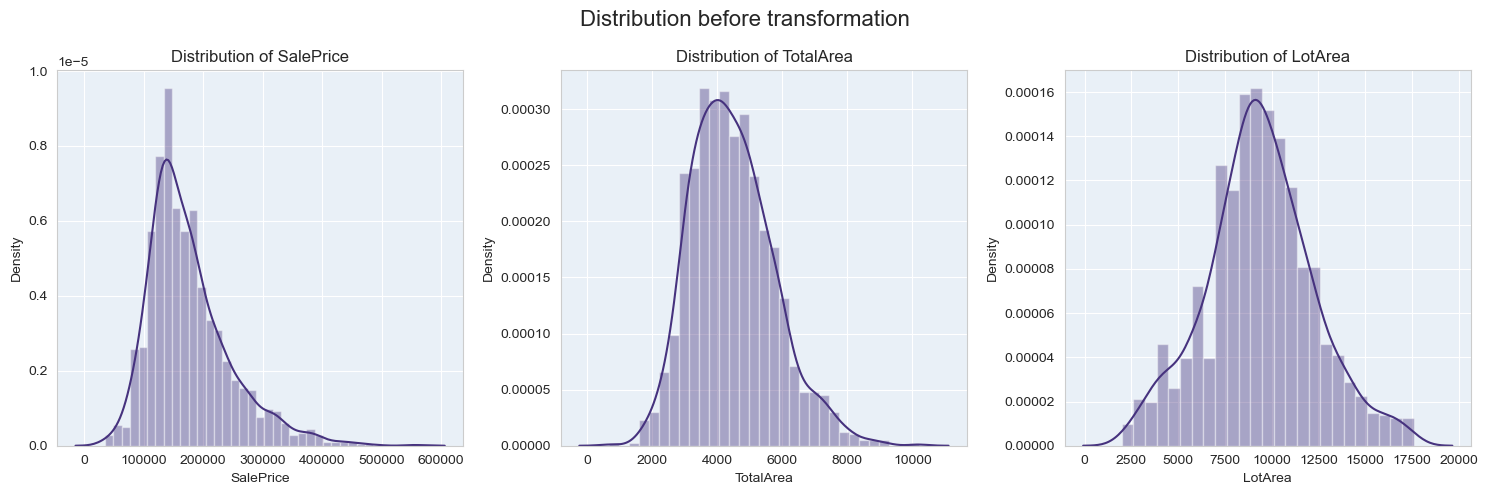

In [26]:
# Inspect the distribution of SalePrice, TotalArea and LotArea
show_distplots(df_housing, ['SalePrice', 'TotalArea', 'LotArea'], 'Distribution before transformation')

It appears that **SalePrice** is severely positively skewed. We will apply log transformation to reduce the impact of extreme values and make the distribution more symmetric. **TotalArea** and **LotArea** seem fine. 

In [27]:
# Applying log transformation to SalePrice to reduce positively skewed distribution
df_housing['LogSalePrice'] = np.log1p(df_housing['SalePrice'])

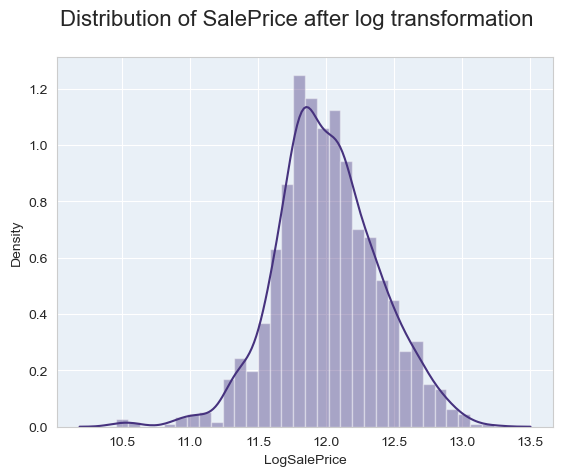

In [28]:
show_distplot(df_housing, 'LogSalePrice', 'Distribution of SalePrice after log transformation')

Sale price is more symmetrically distributed after applying a log transformation.

In [29]:
# Drop sale price as we'll be using LogSalePrice as target variable henceforth
df_housing.drop('SalePrice', axis = 1, inplace=True)

## 2. Data Visualization & EDA
<hr/>

In this section, we visualize and analyze the data through exploratory data analysis (*EDA*) using those visualizations.

In [30]:
# Create a matrix of scatter plots and histograms between provided variables
def show_pairplot(df, fields):
    sns.pairplot(df[fields])
    plt.show()
    
# Show boxplot of cnt against provided categorical variables 
def show_boxplots(df, x_fields, y_field):
    n_rows = int(np.ceil(len(x_fields) / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))
    axes = axes.flatten()
    for i, field in enumerate(x_fields):
        ax = axes[i] 
        sns.boxplot(x=field, y=y_field,data=df, ax=ax)
        # Rotate tick if space is congested
        if len(ax.get_xticklabels()) > 5:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(field)
        ax.set_xlabel('') 

    plt.tight_layout()
    plt.show()

### 2.1 Visualize numeric fields using pairplot

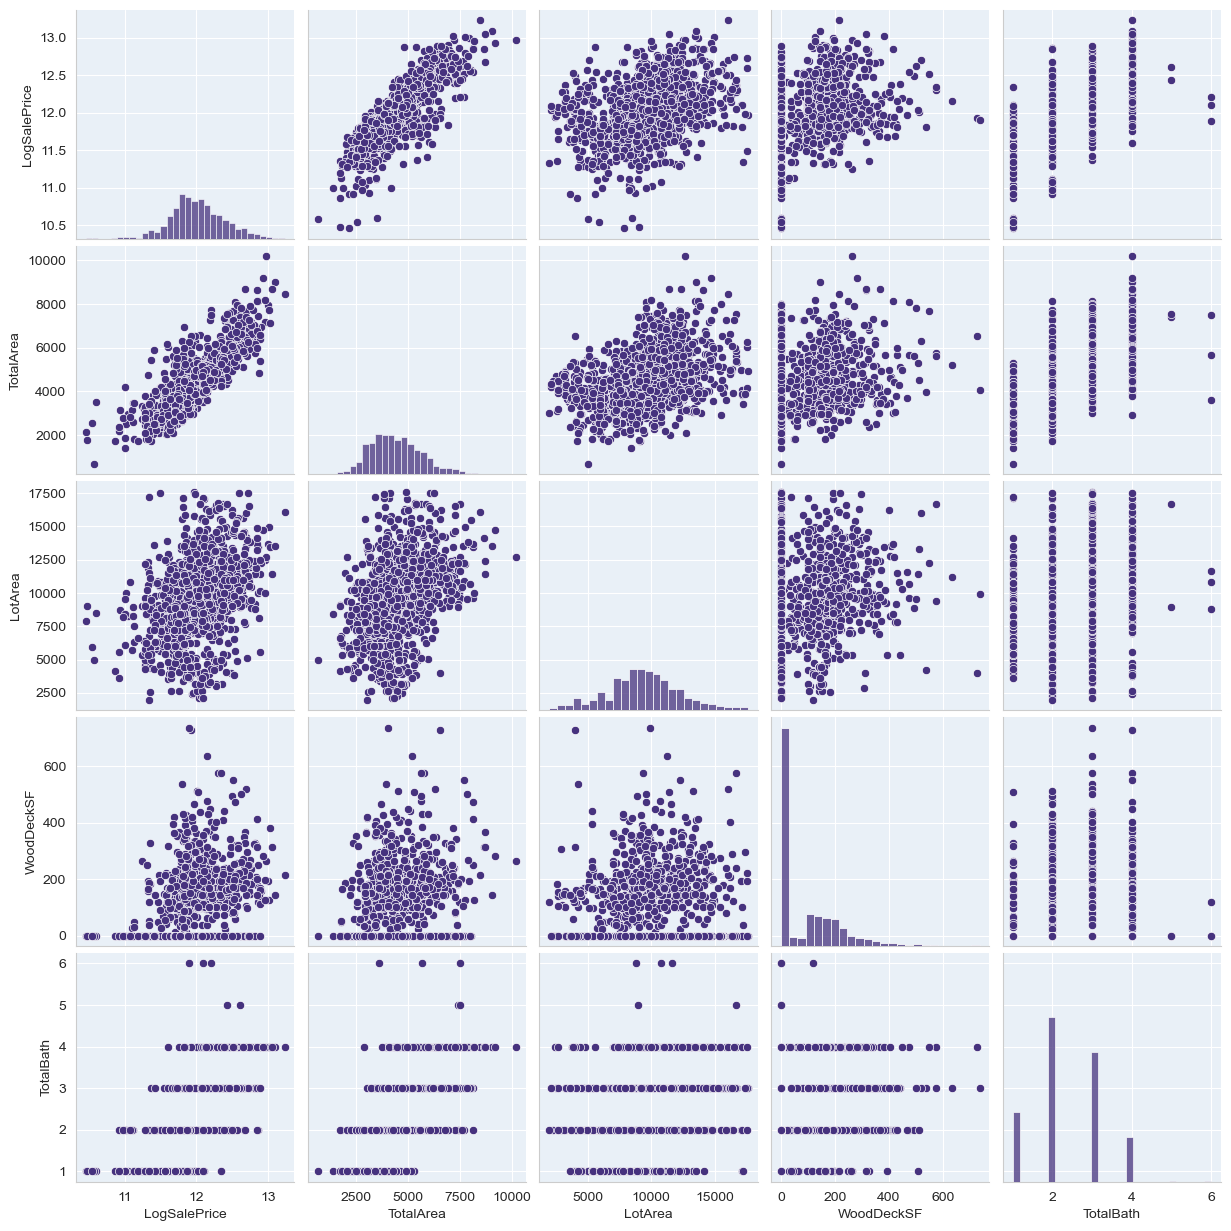

In [31]:
show_pairplot(df_housing, ['LogSalePrice', 'TotalArea', 'LotArea', 'WoodDeckSF', 'TotalBath'])

#### Observations:

- Linear relationship clearly exists between independent and dependent features of this dataset.

### 2.2 Visualize categorical fields using boxplots

We will utilize boxplots to examine the impact of categorical fields on the variable "cnt".

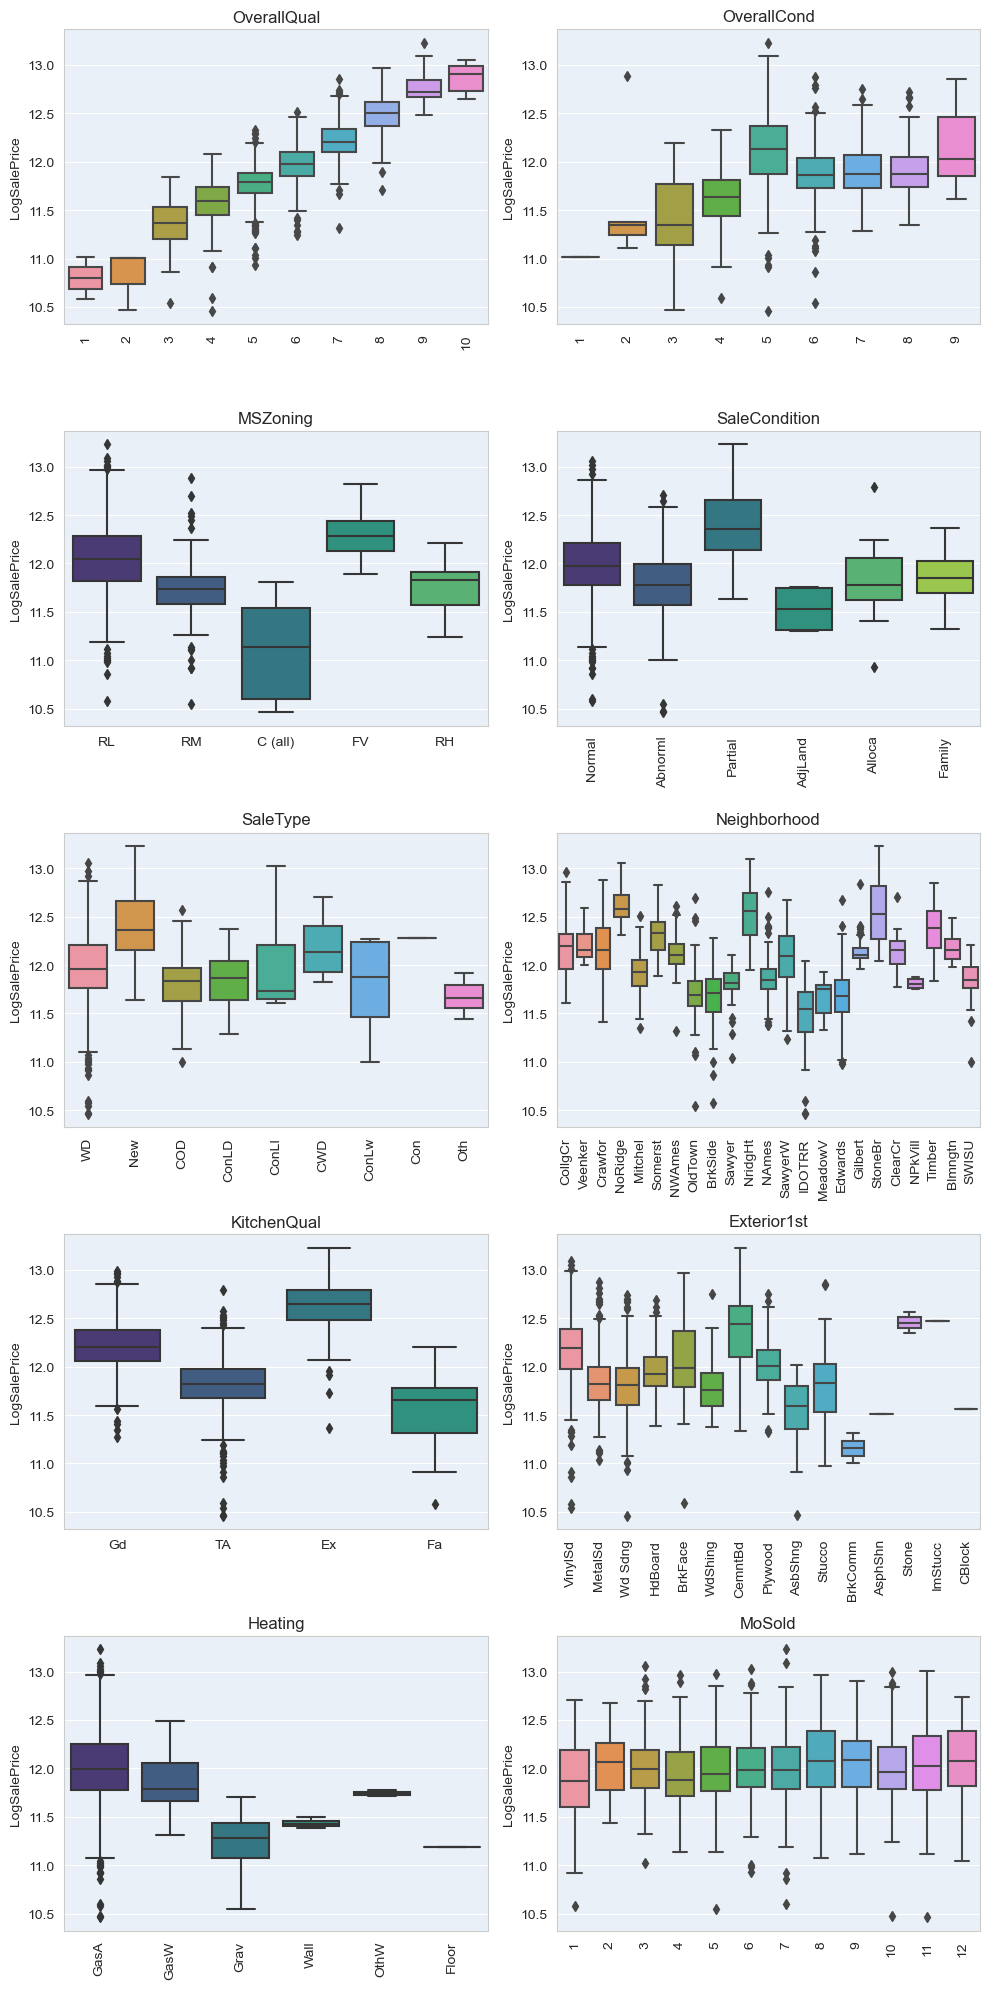

In [32]:
show_boxplots(df_housing, ['OverallQual', 'OverallCond', 'MSZoning', 'SaleCondition', 'SaleType', 'Neighborhood', 'KitchenQual','Exterior1st', 'Heating', 'MoSold'], 'LogSalePrice')

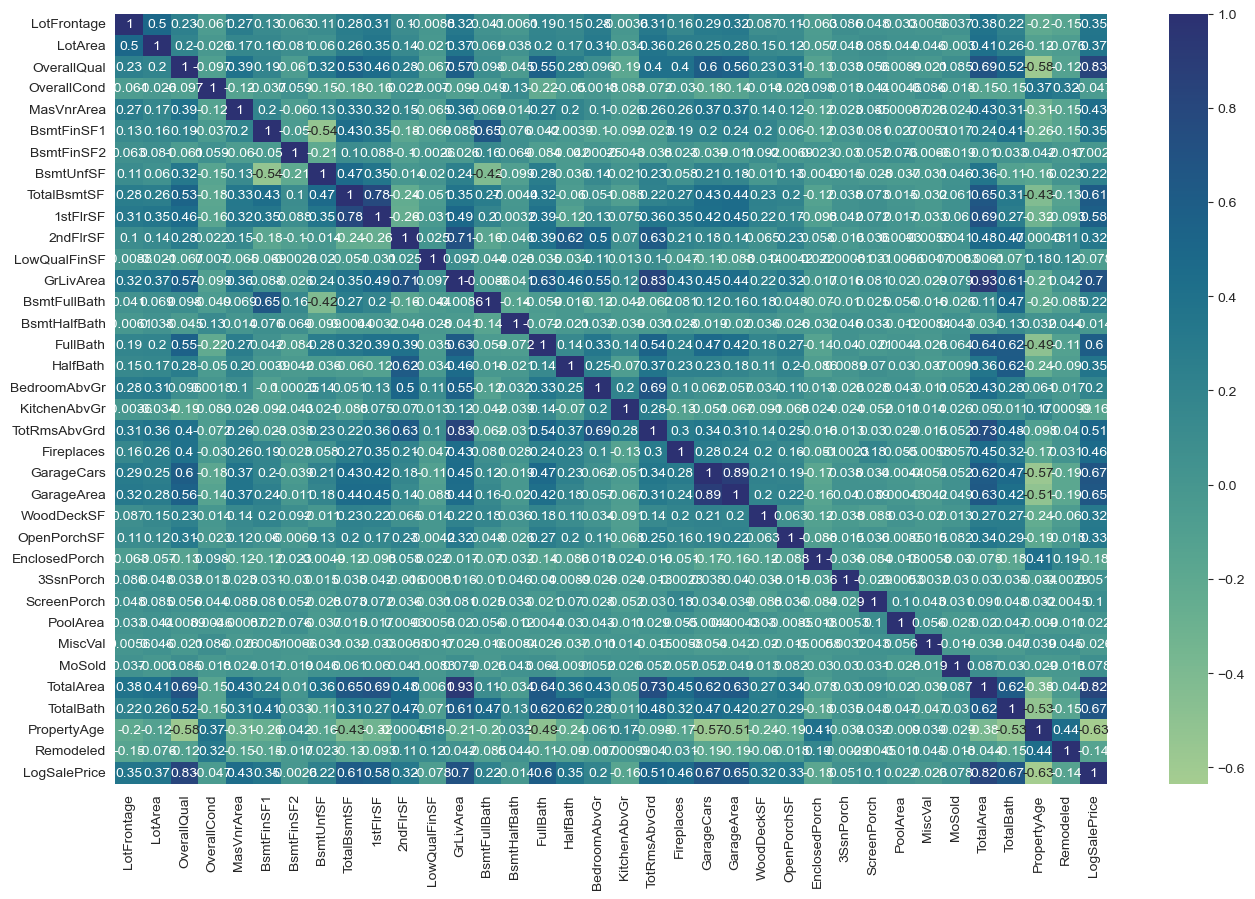

In [33]:
# Plot a heatmap to visualize overall correlation in training set
plt.figure(figsize = (16, 10))
sns.heatmap(df_housing.corr(), annot = True, cmap="crest")
plt.show()

## 3. Data Preparation
<hr/>

### 3.2 Create dummy variables

*When creating dummy variables, we can drop first dummy variable or alternatively we can drop any other dummy variable as long only n-1 dummy variables are kept*

In [34]:
categorical_fields = get_categorical_fields(df_housing)
df_data = pd.get_dummies(df_housing, columns=categorical_fields, drop_first=True)

In [35]:
df_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,TotalArea,TotalBath,PropertyAge,Remodeled,LogSalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,4824,4,7,0,12.247699,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,4246,3,34,0,12.109016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,5100,4,9,1,12.317171,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,4832,2,95,1,11.849405,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,6377,4,10,0,12.429220,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## 4. Splitting Data into Training and Test sets
<hr/>

### 4.1 Split the data into a 70% training set and a 30% test set.

In [36]:
# Ensure reproducibility in random number generation
np.random.seed(0)
# Use train_size of 0.7 (i.e. 70%) and test_size of 0.3 or (i.e. 30%)
df_train, df_test = train_test_split(df_data, train_size = 0.7, random_state = 100)

### 4.2 Rescaling the Features

Apply MinMaxScaler to scale numeric fields between 0 and 1.

In [37]:
# Instantiate MinMaxScaler and fit the training set
numeric_fields = get_numeric_fields(df_data)
scaler = MinMaxScaler()
df_train[numeric_fields] = scaler.fit_transform(df_train[numeric_fields])

# Preview the scaled values
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,TotalArea,TotalBath,PropertyAge,Remodeled,LogSalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1080,0.647887,0.582348,0.555556,0.750,0.137536,0.386792,0.0,0.279610,0.392389,0.360374,0.0,0.0,0.296820,0.000000,0.5,0.666667,0.0,0.500000,0.333333,0.3,0.0,0.50,0.493920,0.074728,0.000000,0.000000,0.425197,0.0,0.0,0.000000,0.818182,0.427178,0.4,0.282609,1.0,0.541194,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.535211,0.451310,0.555556,0.500,0.070678,0.363208,0.0,0.269392,0.373051,0.336193,0.0,0.0,0.276903,0.333333,0.0,0.333333,0.0,0.333333,0.333333,0.4,0.5,0.25,0.277830,0.000000,0.080439,0.000000,0.000000,0.0,0.0,0.000000,0.363636,0.378159,0.2,0.391304,0.0,0.525136,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1452,0.014085,0.109263,0.444444,0.500,0.076409,0.322524,0.0,0.000000,0.170618,0.287832,0.0,0.0,0.237070,0.333333,0.0,0.333333,0.0,0.333333,0.333333,0.3,0.0,0.50,0.491113,0.000000,0.051188,0.000000,0.000000,0.0,0.0,0.000000,0.363636,0.299518,0.2,0.036232,0.0,0.541194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
98,0.718310,0.555691,0.444444,0.500,0.000000,0.063679,0.0,0.162564,0.142857,0.195398,0.0,0.0,0.160938,0.000000,0.0,0.333333,0.0,0.333333,0.333333,0.3,0.0,0.25,0.342376,0.000000,0.000000,0.199482,0.000000,0.0,0.0,0.025806,0.363636,0.214647,0.0,0.652174,1.0,0.329201,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,0.647887,0.515545,0.444444,0.625,0.000000,0.350236,0.0,0.125406,0.269495,0.315913,0.0,0.0,0.260199,0.333333,0.0,0.333333,0.0,0.500000,0.333333,0.4,0.5,0.25,0.246960,0.224185,0.000000,0.000000,0.000000,0.0,0.0,0.025806,0.181818,0.323028,0.2,0.355072,1.0,0.503770,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0

In [38]:
# Drop target variable and assign remaining variables to X_train
X_train = df_train.drop('LogSalePrice', axis=1)

# Assign target variable to y_train
y_train = df_train['LogSalePrice']

## 5. Building Ridge Model
<hr/>

In [39]:
ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]} 

ridge_reg= ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(X_train,y_train)
print(f"The optimal value of Alpha for Ridge regression is: {ridge_reg.best_params_}")
print(f"The best score achieved with Alpha={ridge_reg.best_params_} is: {math.sqrt(-ridge_reg.best_score_):.3f}")

The optimal value of Alpha for Ridge regression is: {'alpha': 5}
The best score achieved with Alpha={'alpha': 5} is: 0.048


In [40]:
ridge_mod=Ridge(alpha=5)
ridge_mod.fit(X_train,y_train)

Ridge(alpha=5)

## 6. Building Lasso Model
<hr/>

In [41]:
params= {'alpha':[0.00009, 0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso(tol=0.01)
lasso_reg=ms.GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(X_train,y_train)

print(f'The optimal value of Alpha for Lasso regression is: {lasso_reg.best_params_}')
print(f"The best score achieved with Alpha={ridge_reg.best_params_} is: {math.sqrt(-ridge_reg.best_score_)}")

The optimal value of Alpha for Lasso regression is: {'alpha': 0.0001}
The best score achieved with Alpha={'alpha': 5} is: 0.047867715737923776


In [42]:
lasso_mod=Lasso(alpha=0.0001)
lasso_mod.fit(X_train,y_train)

Lasso(alpha=0.0001)

## 6. Residual Analysis of the Train data
<hr/>

To assess the normal distribution assumption of the linear regression model, we will analyze residuals on the training data by visualizing the residuals and also by comparing the actual and predicted target values.

In [43]:
# Plot spread of residuals
def plot_pred_vs_residuals(y, y_pred, regression_type):
    # Plot scatterplot of predicted against residuals to test
    residuals = y - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('y-pred', fontsize=12)
    plt.ylabel('Residuals')
    plt.title(f'Residuals plot for {regression_type} regression')
    plt.show()
    
# Plot distribution of residuals
def plot_residuals_distribution(y, y_pred, regression_type):
    # Plot the histogram of the error terms
    residuals = y - y_pred
    sns.displot(residuals, bins = 20, kde=True)
    plt.xlabel('Errors', fontsize = 12)
    plt.title(f'Distribution of Errors for {regression_type} regression')
    plt.show()
    
# Plot regplot of test vs pred values
def plot_pred_vs_actual_regplot(y_test, y_pred, regression_type):
    sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'}, scatter_kws={'color':'green'})
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {regression_type} regression')
    # Display the plot
    plt.show()

#### 6.1 Ridge Regression

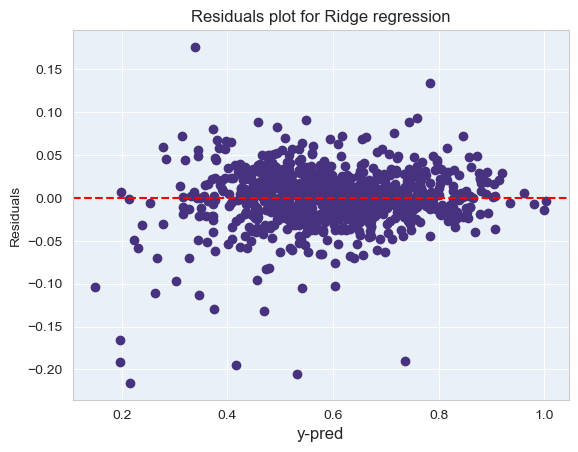

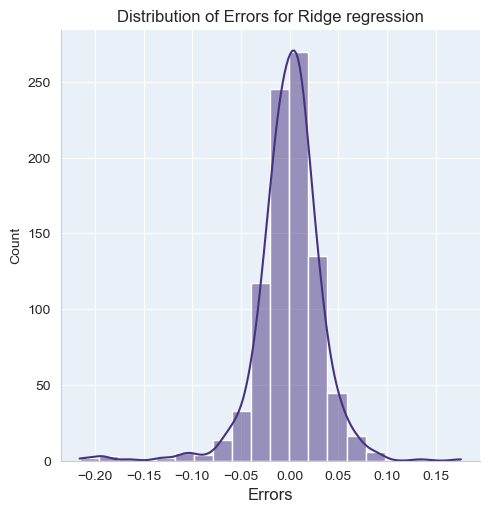

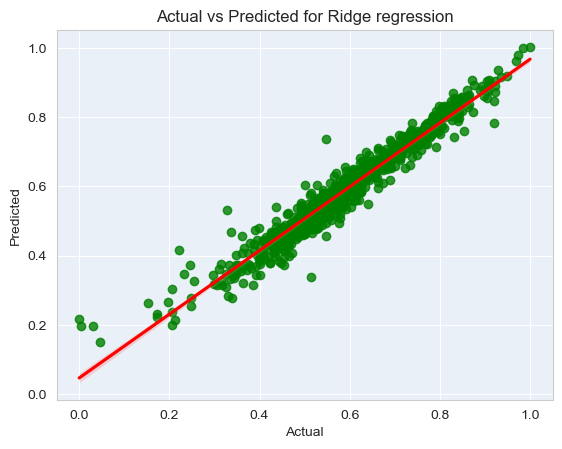

In [44]:
# Predict using Ridge model
y_pred_train_ridge=ridge_mod.predict(X_train)

# Show plots
plot_pred_vs_residuals(y_train, y_pred_train_ridge, 'Ridge')
plot_residuals_distribution(y_train, y_pred_train_ridge, 'Ridge')
plot_pred_vs_actual_regplot(y_train, y_pred_train_ridge, 'Ridge')

#### 6.2 Lasso Regression

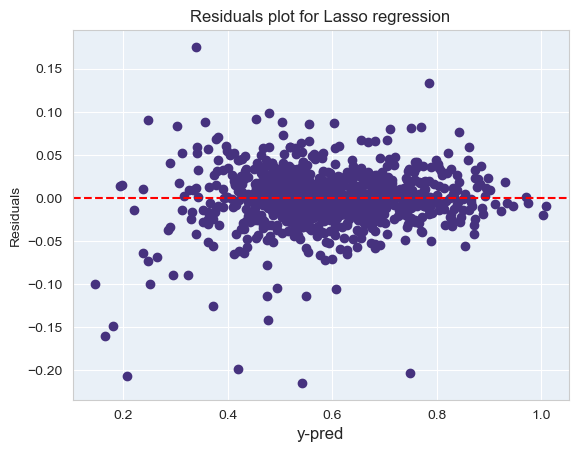

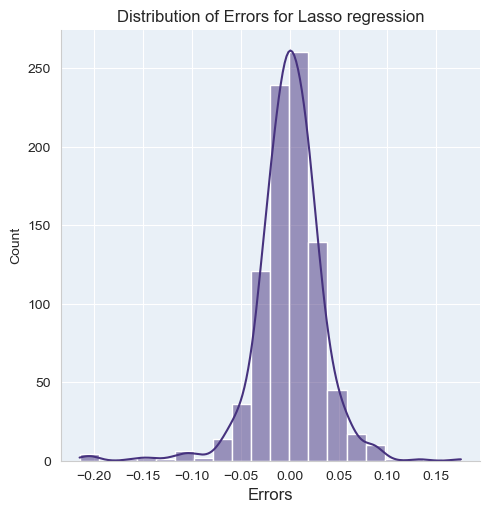

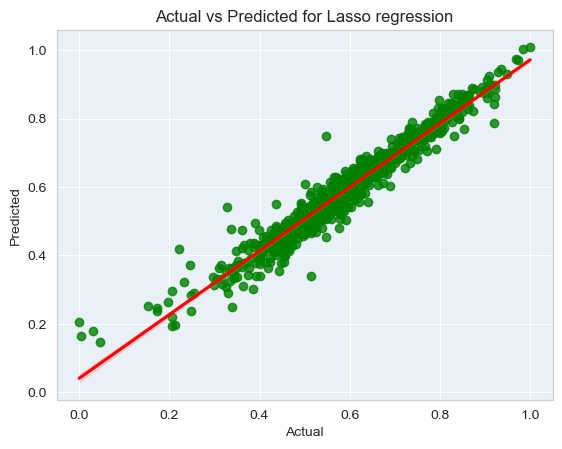

In [45]:
# Predict using Ridge model
y_pred_train_lasso=lasso_mod.predict(X_train)

# Show plots
plot_pred_vs_residuals(y_train, y_pred_train_lasso, 'Lasso')
plot_residuals_distribution(y_train, y_pred_train_lasso, 'Lasso')
plot_pred_vs_actual_regplot(y_train, y_pred_train_lasso, 'Lasso')

## 7. Model Prediction

In [46]:
# Scale test data using the scaler created from traing data
df_test[numeric_fields] = scaler.transform(df_test[numeric_fields])
# Define X and y variables for the test data
X_test = df_test.drop('LogSalePrice', axis=1)
y_test = df_test['LogSalePrice']

#### 7.1 Ridge Regression

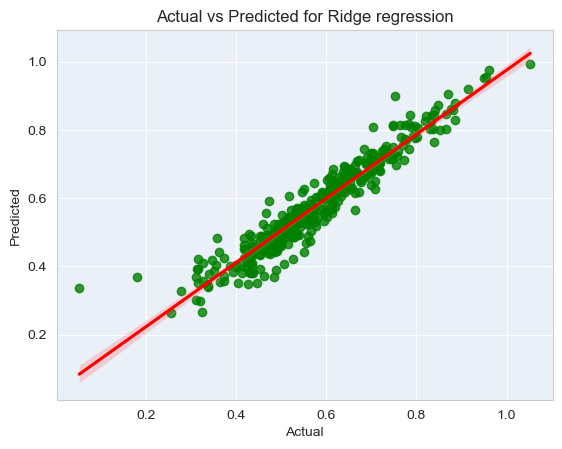

In [47]:
y_pred_test_ridge=ridge_mod.predict(X_test)
plot_pred_vs_actual_regplot(y_test, y_pred_test_ridge, 'Ridge')

#### 7.2 Lasso Regression

In [48]:
# Predict using Lasso model
y_pred_test_lasso=lasso_mod.predict(X_test)

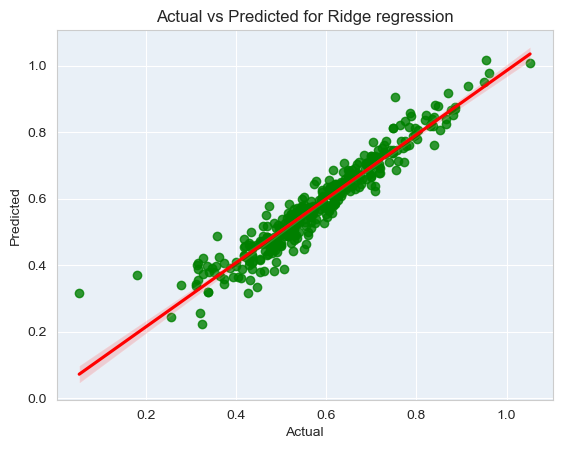

In [49]:
plot_pred_vs_actual_regplot(y_test, y_pred_test_lasso, 'Ridge')

## 8. Model Evaluation

In [57]:
def create_metrics(y_train, y_pred_train, y_test, y_pred_test):
    metrics = []
    r2_train = round(r2_score(y_train, y_pred_train), 3)
    metrics.append(r2_train)

    r2_test = round(r2_score(y_test, y_pred_test), 3)
    metrics.append(r2_test)

    rss_train = round(np.sum(np.square(y_train - y_pred_train)),3)
    metrics.append(rss_train)

    rss_test = round(np.sum(np.square(y_test - y_pred_test)),3)
    metrics.append(rss_test)
    
    mse_train = round(mean_squared_error(y_train, y_pred_train),3)
    metrics.append(mse_train)

    mse_test = round(mean_squared_error(y_test, y_pred_test),3)
    metrics.append(mse_test)

    rmse_train = round(math.sqrt(mean_squared_error(y_train, y_pred_train)),3)
    metrics.append(rmse_train)

    rmse_test = round(math.sqrt(mean_squared_error(y_test, y_pred_test)),3)
    metrics.append(rmse_test)
    return metrics

def create_metrics_df(metrics_ridge, metrics_lasso):
    lr_table = {'Metric': ['R2Score (Train)','R2Score (Test)','RSS (Train)','RSS (Test)',
                            'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
            'Ridge Regression': metrics_ridge,
            'Lasso Regression': metrics_lasso
        }
    return pd.DataFrame(lr_table)

In [58]:
metrics_ridge = create_metrics(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge)
metrics_lasso = create_metrics(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso)

create_metrics_df(metrics_ridge, metrics_lasso)

,Metric,Ridge Regression,Lasso Regression
0,R2Score (Train),0.946,0.944
1,R2Score (Test),0.911,0.915
2,RSS (Train),1.022,1.052
3,RSS (Test),0.671,0.643
4,MSE (Train),0.001,0.001
5,MSE (Test),0.002,0.002
6,RMSE (Train),0.034,0.034
7,RMSE (Test),0.042,0.041


## 9. Conclusion

In [68]:
# Shows a horizontal bar chart of model coefficients
def plot_coefficients(ax, coefficients, columns, limit):
    coefs = pd.Series(coefficients, index = columns)
    imp_coefs = pd.concat([coefs.sort_values().head(limit),
                         coefs.sort_values().tail(limit)])
    imp_coefs.plot(kind = "barh", ax=ax)
    
# Shows a horizontal bar chart of model coefficients for both Ridge and Lasso models
def plot_model_features(ridge_coefficients, lasso_coefficients, columns, limit):
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Ridge coefficients
    plot_coefficients(axes[0], ridge_coefficients, columns, limit)
    axes[0].set_title("Most important features using Ridge Model")
    axes[0].set_xlabel("Ridge coefficients")
    axes[0].set_ylabel('Features')
    
    # Lasso coefficients
    plot_coefficients(axes[1], lasso_coefficients, columns, limit)
    axes[1].set_title("Most important features using Lasso Model")
    axes[1].set_xlabel("Lasso coefficients")
    axes[1].set_ylabel('Features')

    plt.tight_layout()
    plt.show()
    
def get_top_features(coefficients, columns):
    # Create a DataFrame with feature names and coefficients
    df_coefficients = pd.DataFrame({'Feature': columns, 'Coefficient': coefficients})
    df_sorted = df_coefficients.reindex(df_coefficients['Coefficient'].abs().sort_values(ascending=False).index)
    return df_sorted

def get_features_with_zero_coeff(coefficients, columns):
    return [feature for feature, coef in zip(columns, coefficients) if coef == 0]

#### 9.1 Comparision of Ridge vs Lasso model coefficients

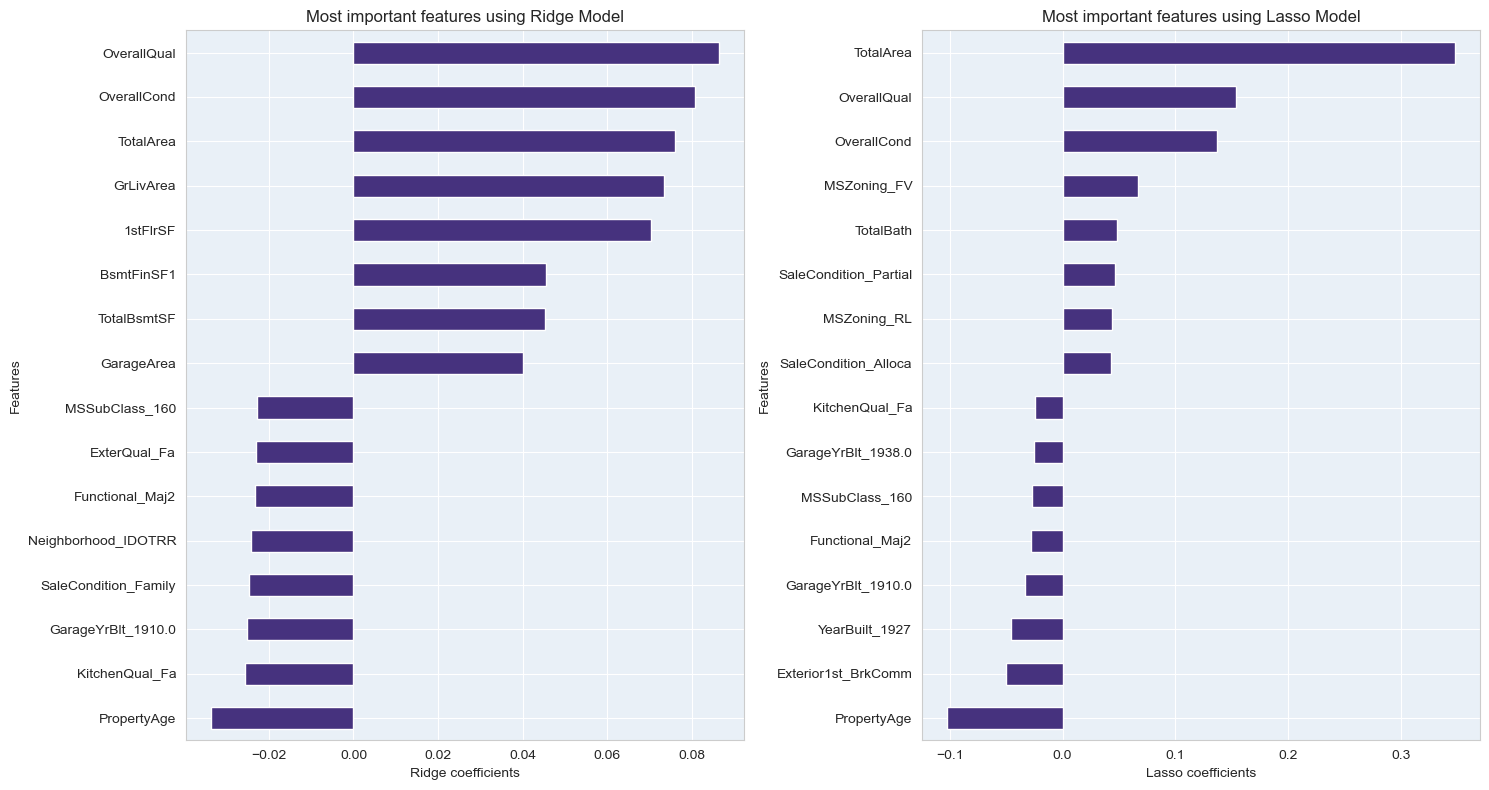

In [53]:
plot_model_features(ridge_mod.coef_, lasso_mod.coef_, X_train.columns, 8)

#### 9.2 Top 10 features in Ridge model

In [54]:
get_top_features(ridge_mod.coef_, X_train.columns).head(10)

,Feature,Coefficient
2,OverallQual,0.086322
3,OverallCond,0.080724
31,TotalArea,0.076046
12,GrLivArea,0.073458
9,1stFlrSF,0.070318
5,BsmtFinSF1,0.045603
8,TotalBsmtSF,0.045247
22,GarageArea,0.040007
86,Neighborhood_StoneBr,0.038980
49,MSZoning_FV,0.037228


#### 9.3 Top 10 features in Lasso model

In [62]:
get_top_features(lasso_mod.coef_, X_train.columns).head()

,Feature,Coefficient
31,TotalArea,0.347536
2,OverallQual,0.153322
3,OverallCond,0.137154
33,PropertyAge,-0.102042
49,MSZoning_FV,0.066882
292,Exterior1st_BrkComm,-0.050377
32,TotalBath,0.048528
524,SaleCondition_Partial,0.046409
142,YearBuilt_1927,-0.045360
51,MSZoning_RL,0.043837


#### 9.4 Number of features removed by Lasso regression

In [72]:
removed_features = get_features_with_zero_coeff(lasso_mod.coef_, X_train.columns)
print(f"{len(removed_features)} features have been removed by Lasso regression.")

331 features have been removed by Lasso regression.


#### 9.5 Most important features that help predict the house price

In conclusion, the top 10 most features (ordered by importance) that help predict the house price include the following.

1. **TotalArea**: Total internal area of the house **highly positively correlated** with price
2. **OverallQual**: Overall quality of the house (**higher the better price**)
3. **OverallCond**: Overall condition of the house (**higher the better price**)
4. **PropertyAge**: Property age at time of sale (**younger the better price**)
5. **MSZoning_FV**: Floating Village Residential draws **higher price**
6. **Exterior1st_BrkComm**: Houses with common brick exterior covering draws **lower price**
7. **TotalBath**: Total number of bathrooms (**more the better price**)
8. **SaleCondition_Partial**: This is associated New Homes and it draws **higher price**
9. **YearBuilt_1927**: Houses built in 1927 draws **lower price**
10. **MSZoning_RL**: Residential Low Density zoning draws **higher price**